# Apply mask

This notebook shows how to apply a mask from a external image.

In [20]:
import xarrayaita.loadData_aita as lda #here are some function to build xarrayaita structure
import xarrayaita.aita as xa
import xarrayuvecs.uvecs as xu

import xarray as xr
import tifffile
import matplotlib.pyplot as plt

## Load your data

In [2]:
# path to data and microstructure
path_data='orientation_test.dat'
path_micro='micro_test.bmp'

In [3]:
data=lda.aita5col(path_data,path_micro)

In [5]:
data

<xarray.Dataset> Size: 100MB
Dimensions:      (y: 2500, x: 1000, uvecs: 2)
Coordinates:
  * x            (x) float64 8kB 0.0 0.02 0.04 0.06 ... 19.92 19.94 19.96 19.98
  * y            (y) float64 20kB 49.98 49.96 49.94 49.92 ... 0.06 0.04 0.02 0.0
Dimensions without coordinates: uvecs
Data variables:
    orientation  (y, x, uvecs) float64 40MB 2.395 0.6451 5.377 ... 0.6098 0.6473
    quality      (y, x) int64 20MB 0 90 92 93 92 92 94 ... 96 96 96 96 97 97 96
    micro        (y, x) float64 20MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId      (y, x) int64 20MB 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes:
    date:       b'Thursday, 19 Nov 2015, 11:24 am\r'
    unit:       millimeters
    step_size:  0.02
    path_dat:   orientation_test.dat

## Load mask
This commande line load a tiff but only used the first channel. It transforms this channel into a booleen value.

In [ ]:
data['mask']=xr.DataArray(tifffile.imread("mask_test.tiff")[...,0]>1,dims=['y','x'])

(-0.01, 19.990000000000002, -0.010000000000001563, 49.99000000000001)

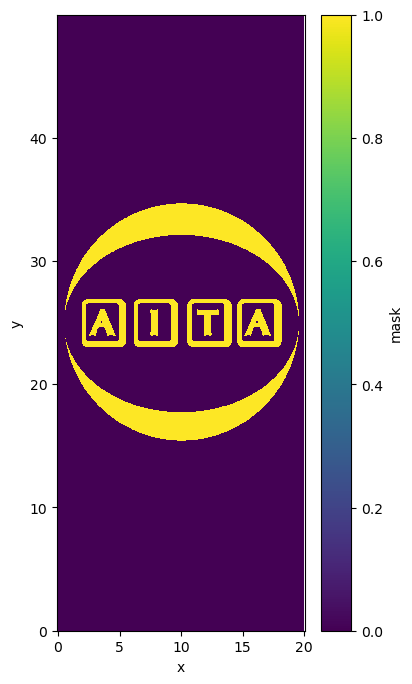

In [16]:
plt.figure(figsize=(4,8))
data['mask'].plot()
plt.axis('equal')

## Applied the mask

This direct applicatation of `xarray` power. It has nothing to do with the accessor `xarrayaita`. 

In [17]:
masked_data=data.where(data.mask)

In [18]:
masked_data

<xarray.Dataset> Size: 120MB
Dimensions:      (y: 2500, x: 1000, uvecs: 2)
Coordinates:
  * x            (x) float64 8kB 0.0 0.02 0.04 0.06 ... 19.92 19.94 19.96 19.98
  * y            (y) float64 20kB 49.98 49.96 49.94 49.92 ... 0.06 0.04 0.02 0.0
Dimensions without coordinates: uvecs
Data variables:
    orientation  (y, x, uvecs) float64 40MB nan nan nan nan ... nan nan nan nan
    quality      (y, x) float64 20MB nan nan nan nan nan ... nan nan nan nan nan
    micro        (y, x) float64 20MB nan nan nan nan nan ... nan nan nan nan nan
    grainId      (y, x) float64 20MB nan nan nan nan nan ... nan nan nan nan nan
    mask         (y, x) float64 20MB nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    date:       b'Thursday, 19 Nov 2015, 11:24 am\r'
    unit:       millimeters
    step_size:  0.02
    path_dat:   orientation_test.dat

In [24]:
masked_data['FullColormap']=masked_data.orientation.uvecs.calc_colormap()

(-0.01, 19.990000000000002, -0.010000000000001563, 49.99000000000001)

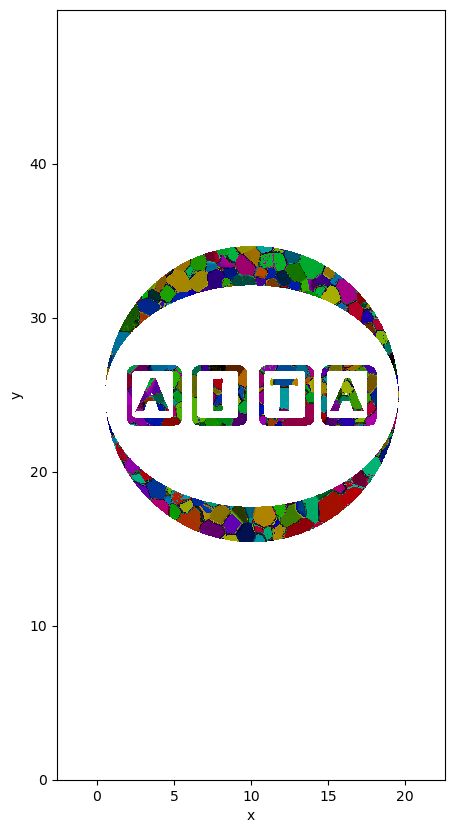

In [25]:
plt.figure(figsize=(5,10))
masked_data.FullColormap.plot.imshow()
plt.axis('equal')